<a href="https://colab.research.google.com/github/bhaskarvenna/MachineLearning_InDepth/blob/main/Classification_MNIST_IndepthResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"Jsglp"

'Jsglp'

In [80]:
import sys

assert sys.version_info >= (3, 7)

In [81]:
#https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb

In [82]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

let's define the default font sizes to make the figures prettier:



In [83]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the images/classification folder (if it doesn't already exist), and define the save_fig() function which is used through this notebook to save the figures in high-res for the book:

In [84]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# **MNIST**

MNIST stands for Modified National Institute of Standards and Technology dataset. It is one of the most popular datasets in machine learning and computer vision, widely used for benchmarking image recognition algorithms. MNIST consists of grayscale images of handwritten digits and their corresponding labels.

In this chapter we will be using the MNIST dataset, which is a set of 70,000 small
images of digits handwritten by high school students and employees of the US
Census Bureau. Each image is labeled with the digit it represents. This set has
been studied so much that it is often called the “hello world” of machine learning:
whenever people come up with a new classification algorithm they are curious to see
how it will perform on MNIST, and anyone who learns machine learning tackles this
dataset sooner or later.

In [85]:
import tensorflow as tf

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten the images (optional)
X_train = X_train.reshape(-1, 28 * 28) / 255.0  # Normalize to [0, 1]
X_test = X_test.reshape(-1, 28 * 28) / 255.0

print(f"Training data shape: {X_train.shape}")  # (60000, 784)
print(f"Training labels shape: {y_train.shape}")  # (60000,)

Training data shape: (60000, 784)
Training labels shape: (60000,)


In [86]:
X_train.shape

(60000, 784)

Below is One Image, see how data is stored , this 28 * 28 pixel which is equaly sot 784 pixes, so each pixel is stored

In [87]:
X_train[0].shape

(784,)

In [88]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [89]:
X_train[0].shape

(784,)

In [90]:
y_train.shape

(60000,)

In [91]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [92]:
28*28

784

There are 70,000 images, and each image has 784 features. This is because each image
is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0
(white) to 255 (black). Let’s take a peek at one digit from the dataset (Figure 3-1).
All we need to do is grab an instance’s feature vector, reshape it to a 28 × 28 array,
and display it using Matplotlib’s imshow() function. We use cmap="binary" to get a
grayscale color map where 0 is white and 255 is black:

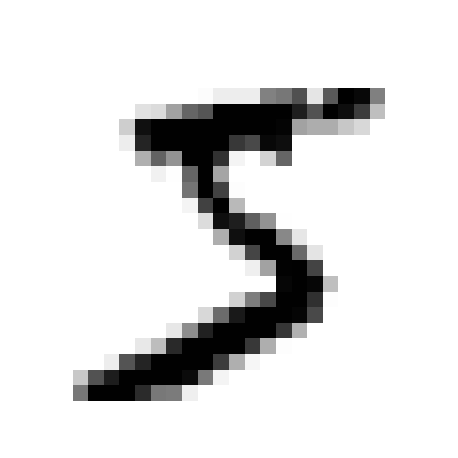

In [93]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X_train[0]
plot_digit(some_digit)
save_fig("some_digit_plot")  # extra code
plt.show()

This looks like a 5, and indeed that’s what the label tells us:

In [94]:
y_train[0]

5

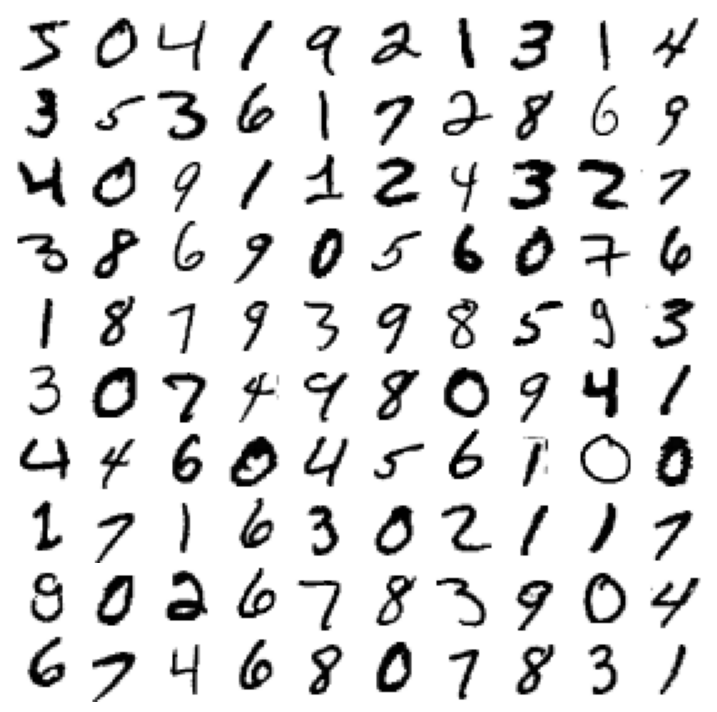

In [95]:
# extra code – this cell generates and saves Figure 3–2
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X_train[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

In [96]:
y_train[:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

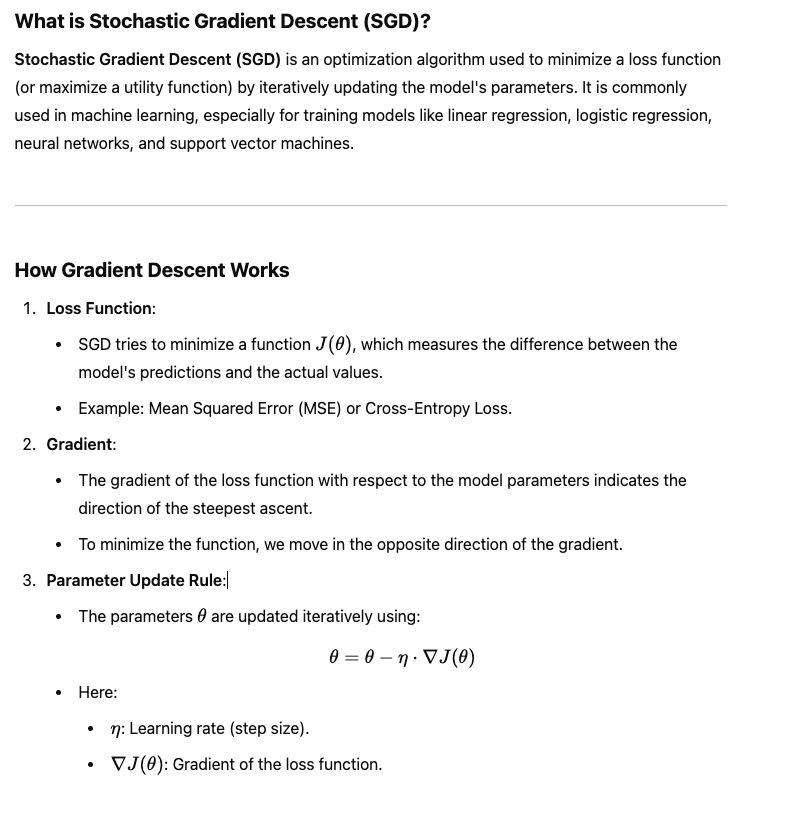

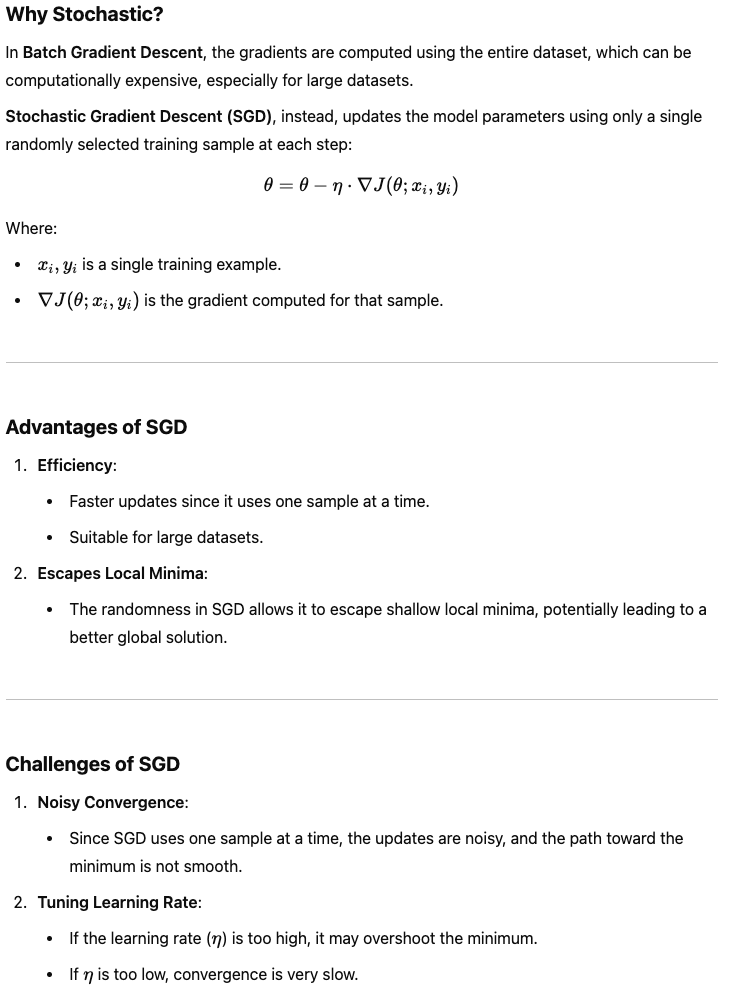

In [97]:
#example of SGD on random data set,
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a dataset
X_dummy, y_dummy = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = train_test_split(X_dummy, y_dummy, test_size=0.2, random_state=42)

# Initialize SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

#1e-3 belowis the definition of this value:
#This is the tolerance for stopping criteria.
#If the improvement in the objective function (e.g., loss) between consecutive iterations is less than this value (0.001 in this case), the training stops early (converges).
#A smaller value means stricter convergence criteria, possibly requiring more iterations.

# Train the model
sgd_clf.fit(X_train_dummy, y_train_dummy)

# Evaluate the model
y_pred_dummy = sgd_clf.predict(X_test_dummy)
print("Accuracy:", accuracy_score(y_test_dummy, y_pred_dummy))


Accuracy: 0.8


Interview questions: what is the difference between Stochostic Gradient Descent vs GridSearchCS?


1. Grid Search CV:
Grid Search is an exhaustive search technique where every possible combination of hyperparameters is systematically evaluated to find the best configuration.

2. Stochastic Gradient Descient:
Stochastic Search involves using randomized or probabilistic approaches to explore the hyperparameter space, focusing on sampling rather than exhaustive evaluation.

# **Training a Binary Classifier**


Let’s simplify the problem for now and only try to identify one digit—for example,
the number 5. This “5-detector” will be an example of a binary classifier, capable
of distinguishing between just two classes, 5 and non-5. First we’ll create the target
vectors for this classification task:
y_train_5 = (y_train == '5') # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')
Now let’s pick a classifier and train it. A good place to start is with a stochastic gra‐
dient descent (SGD, or stochastic GD) classifier, using Scikit-Learn’s SGDClassifier
class. This classifier is capable of handling very large datasets efficiently. This is in
part because SGD deals with training instances independently, one at a time, which
also makes SGD well suited for online learning, as you will see later. Let’s create an
SGDClassifier and train it on the whole training set:

In [98]:
#y_train contains labels for all digits (0-9), however lets only table 5
y_train_5 = (y_train == 5)  # True for digit '5', False otherwise
y_test_5 = (y_test == 5)    # For the test set


In [99]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [100]:
y_test_5

array([False, False, False, ..., False,  True, False])

In [101]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [102]:
#above we have this some_digit = X_train[0] , which currently storeed  value -->5 at x[0] position
sgd_clf.predict([some_digit])

array([ True])

The classifier guesses that this image represents a 5 (True). Looks like it guessed right
in this particular case! Now, let’s evaluate this model’s performance

# **Performance Measures**
Evaluating a classifier is often significantly trickier than evaluating a regressor, so we
will spend a large part of this chapter on this topic. There are many performance
measures available, so grab another coffee and get ready to learn a bunch of new
concepts and acronyms!

# Measuring Accuracy Using Cross-Validation

A good way to evaluate a model is to use cross-validation, just as you did in
Linear Regression Chapter. Let’s use the cross_val_score() function to evaluate our SGDClassifier
model, using k-fold cross-validation with three folds. Remember that k-fold crossvalidation means splitting the training set into k folds (in this case, three), then
training the model k times, holding out a different fold each time for evaluation (see
Chapter 2):

Measur accurance using  class called:



> **cross_val_score**



In [103]:
#remeber X_train has actual image , and y_train_5, has if it is then it will have true else false
from sklearn.model_selection import cross_val_score
#below can see 3 accuracy scores
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9748, 0.9657, 0.9692])

Wow! Above 95% accuracy (ratio of correct predictions) on all cross-validation folds?
This looks amazing, doesn’t it? Well, before you get too excited, let’s look at a dummy
classifier that just classifies every single image in the most frequent class, which in
this case is the negative class (i.e., non 5):

**Implementing Cross-Validation**
Occasionally you will need more control over the cross-validation process than
what Scikit-Learn provides off the shelf. In these cases, you can implement crossvalidation yourself. The following code does roughly the same thing as Scikit-Learn’s.

**The StratifiedKFold class** performs stratified sampling (as explained in Chapter 2)
to produce folds that contain a representative ratio of each class. At each iteration the
code creates a clone of the classifier, trains that clone on the training folds, and makes
predictions on the test fold. Then it counts the number of correct predictions and
outputs the ratio of correct predictions.

Measur accurance using  class called:

> **StratifiedKFold**



In [104]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is not
                                       # already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9748
0.9657
0.9692


In [105]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Measur accurance using  class called:




> **DummyClassifier**



In [106]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [107]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

ImpNote:
# This demonstrates why accuracy is generally not the preferred performance measurefor classifiers, especially when you are dealing with skewed datasets (i.e., **when some classes are much more frequent than others**). A much better way to evaluate the performance of a classifier is to look at the confusion matrix (CM).

# **Confusion Matrix**

The general idea of a confusion matrix is to count the number of times instances of
class A are classified as class B, for all A/B pairs. For example, to know the number of
times the classifier confused images of 8s with 0s, you would look at row with #8, column with #0 of the confusion matrix.\
To compute the confusion matrix, you first need to have a set of predictions so that
they can be compared to the actual targets. You could make predictions on the test
set, but it’s best to keep that untouched for now (remember that you want to use the
test set only at the very end of your project, once you have a classifier that you are
ready to launch). Instead, you can use the cross_val_predict() function:
Just like the cross_val_score() function, cross_val_predict() performs k-fold
cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each instance in the training set (by “clean” I mean “out-of-sample”: the model makes
predictions on data that it never saw during training).
Now you are ready to get the confusion matrix using the confusion_matrix()
function. Just pass it the target classes (y_train_5) and the predicted classes
(y_train_pred):

 **My Self notes:
What you actual want it would always be in True Positive and False Negative
what you actually dont want would always in otherside**

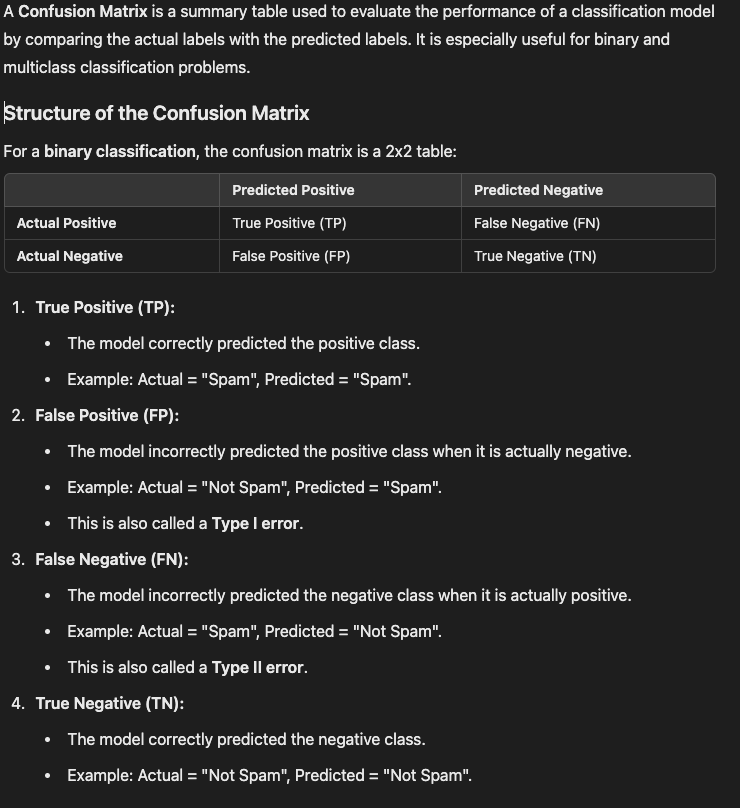

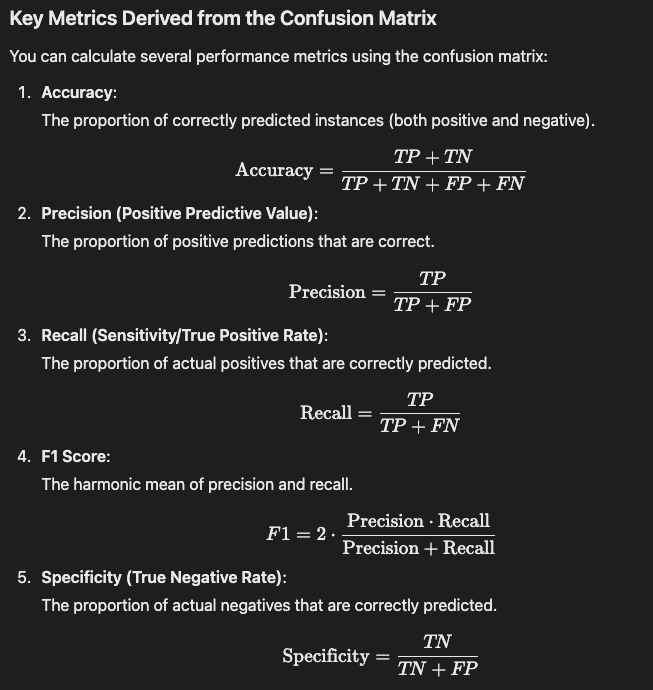

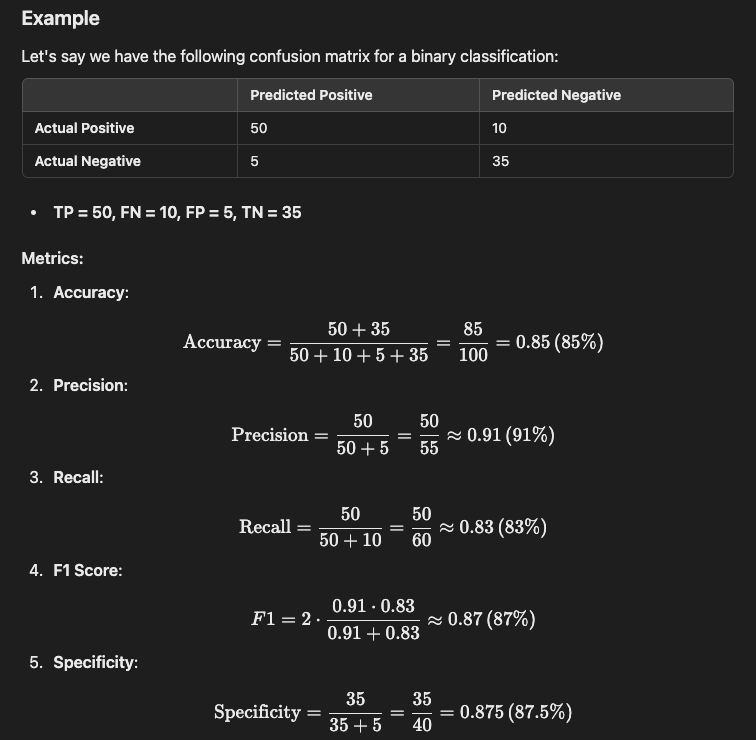

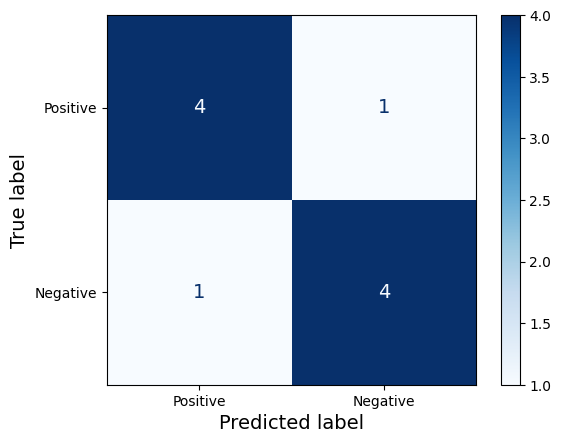

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example actual and predicted values
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]  # Ground truth
y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]  # Predictions

# Compute confusion matrix
cm_1 = confusion_matrix(y_true, y_pred, labels=[1, 0])

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=["Positive", "Negative"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [109]:
#above sgd_clf = SGDClassifier(random_state=42)
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [110]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53613,   966],
       [  840,  4581]])

Each row in a confusion matrix represents an actual class, while each column rep‐
resents a predicted class.



*   The first row of this matrix considers non-5 images (the negative class): 53,613 of them were correctly classified as non-5s (they are called true
negatives)

*   while the remaining 966 were wrongly classified as 5s (false positives, also
called type I errors)
*   The second row considers the images of 5s (the positive class):
840 were wrongly classified as non-5s (false negatives, also called type II errors)
*   while the remaining 4581 were correctly classified as 5s (true positives). A perfect
classifier would only have true positives and true negatives,

 so its confusion matrix
would have nonzero values only on its main diagonal (top left to bottom right):

In [112]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
cm_2=confusion_matrix(y_train_5, y_train_perfect_predictions)
cm_2

array([[54579,     0],
       [    0,  5421]])

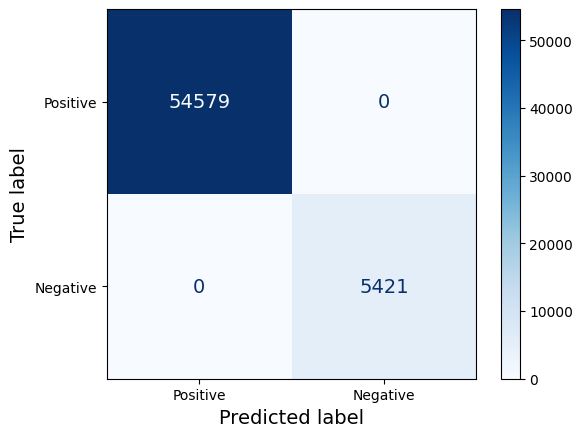

In [113]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=["Positive", "Negative"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

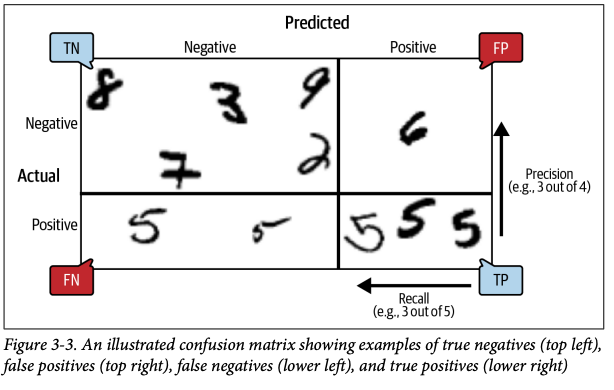


# Precision and Recall
Precission= TP/(TP+FP)\
Recall = TP/(TP+FN)

Scikit-Learn provides several functions to compute classifier metrics, including preci‐
sion and recall

In [114]:
#above we have this y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

0.8258518117901569

In [115]:
# extra code – this cell also computes the precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])


0.8258518117901569

In [116]:
recall_score(y_train_5, y_train_pred)  # == 3530 / (1891 + 3530)

0.8450470392916436

In [117]:
# extra code – this cell also computes the recall: TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.8450470392916436

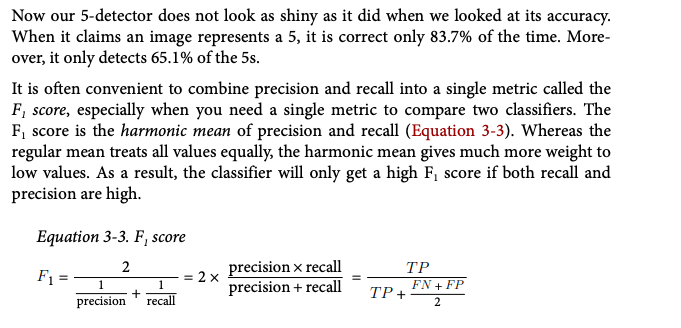

# f1_score Combines both Precission & Recall into single score using

In [118]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.8353391684901532

In [119]:
# extra code – this cell also computes the f1 score
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.8353391684901532

The F1
score favors classifiers that have similar precision and recall. This is not always
what you want: in some contexts you mostly care about precision, and in other
contexts you really care about recall. For example, if you trained a classifier to detect
videos that are safe for kids, you would probably prefer a classifier that rejects many
good videos (low recall) but keeps only safe ones (high precision), rather than a
classifier that has a much higher recall but lets a few really bad videos show up in
your product (in such cases, you may even want to add a human pipeline to check
the classifier’s video selection). On the other hand, suppose you train a classifier to
detect shoplifters in surveillance images: it is probably fine if your classifier only has
30% precision as long as it has 99% recall (sure, the security guards will get a few false
alerts, but almost all shoplifters will get caught).
Unfortunately, you can’t have it both ways: increasing precision reduces recall, and
vice versa. This is called the precision/recall trade-off.

# The Precision/Recall Trade-off

To understand this trade-off, let’s look at how the SGDClassifier makes its classifica‐
tion decisions. For each instance, it computes a score based on a decision function.
If that score is greater than a threshold, it assigns the instance to the positive class;
otherwise it assigns it to the negative class. Figure 3-4 shows a few digits positioned
from the lowest score on the left to the highest score on the right. Suppose the
decision threshold is positioned at the central arrow (between the two 5s): you will
Performance Measures | 111
find 4 true positives (actual 5s) on the right of that threshold, and 1 false positive
(actually a 6). Therefore, with that threshold, the precision is 80% (4 out of 5). But
out of 6 actual 5s, the classifier only detects 4, so the recall is 67% (4 out of 6). If
you raise the threshold (move it to the arrow on the right), the false positive (the
6) becomes a true negative, thereby increasing the precision (up to 100% in this
case), but one true positive becomes a false negative, decreasing recall down to 50%.
Conversely, lowering the threshold increases recall and reduces precision.

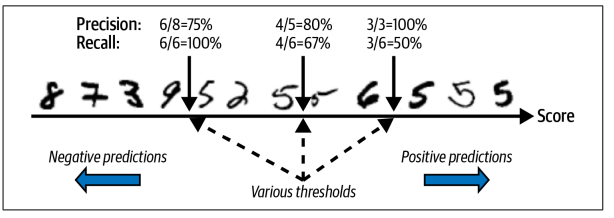

 *Figure above, The precision/recall trade-off: images are ranked by their classifier score,
and those above the chosen decision threshold are considered positive; the higher the
threshold, the lower the recall, but (in general) the higher the precision.*

Scikit-Learn does not let you set the threshold directly, but it does give you access to
the decision scores that it uses to make predictions. Instead of calling the classifier’s
predict() method, you can call its decision_function() method, which returns a
score for each instance, and then use any threshold you want to make predictions
based on those scores:

In [120]:
#some_digit=5
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([0.49010893])

In [121]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [122]:
y_some_digit_pred

array([ True])

In [123]:
# extra code – just shows that y_scores > 0 produces the same result as
#              calling predict()
y_scores > 0

array([ True])

The SGDClassifier uses a threshold equal to 0, so the preceding code returns the
same result as the predict() method (i.e., True). Let’s raise the threshold:

In [124]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

This confirms that raising the threshold decreases recall. The image actually repre‐
sents a 5, and the classifier detects it when the threshold is 0, but it misses it when the
threshold is increased to 3,000.

How do you decide which threshold to use? First, use the cross_val_predict()
function to get the scores of all instances in the training set, but this time specify that
you want to return decision scores instead of predictions:

In [125]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

With these scores, use the precision_recall_curve() function to compute precision
and recall for all possible thresholds (the function adds a last precision of 0 and a last
recall of 1, corresponding to an infinite threshold):

In [126]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Below code not plotting properly so i pasted image in the next cell of below code



In [127]:
# plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
# plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
# plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
# plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# # extra code – this section just beautifies and saves Figure 3–5
# idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
# plt.plot(thresholds[idx], precisions[idx], "bo")
# plt.plot(thresholds[idx], recalls[idx], "go")
# plt.axis([-50000, 50000, 0, 1])
# plt.grid()
# plt.xlabel("Threshold")
# plt.legend(loc="center right")
# save_fig("precision_recall_vs_threshold_plot")

# plt.show()

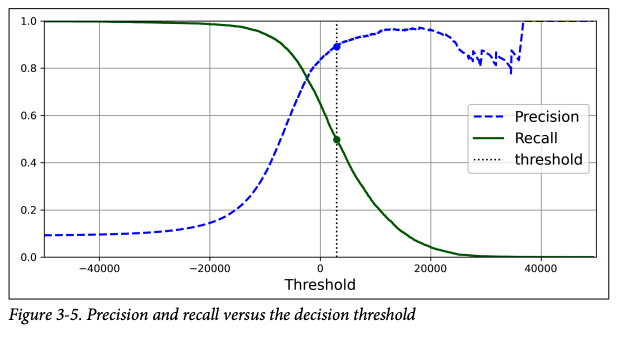

You may wonder why the precision curve is bumpier than the recall
curve in above. The reason is that precision may sometimes go
down when you raise the threshold (although in general it will go
up). To understand why, look back at Figure 3-4 and notice what
happens when you start from the central threshold and move it
just one digit to the right: precision goes from 4/5 (80%) down to
3/4 (75%). On the other hand, recall can only go down when the
threshold is increased, which explains why its curve looks smooth.
Performance Measures | 113
At this threshold value, precision is near 90% and recall is around 50%. Another way
to select a good precision/recall trade-off is to plot precision directly against recall, as
shown in Figure 3-6 (the same threshold is shown):

In [128]:
# import matplotlib.patches as patches  # extra code – for the curved arrow

# plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

# plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# # extra code – just beautifies and saves Figure 3–6
# plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
# plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
# plt.plot([recalls[idx]], [precisions[idx]], "ko",
#          label="Point at threshold 3,000")
# plt.gca().add_patch(patches.FancyArrowPatch(
#     (0.79, 0.60), (0.61, 0.78),
#     connectionstyle="arc3,rad=.2",
#     arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
#     color="#444444"))
# plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.axis([0, 1, 0, 1])
# plt.grid()
# plt.legend(loc="lower left")
# save_fig("precision_vs_recall_plot")

# plt.show()

above code not plotting properly so i pasted image in the next cell of below code


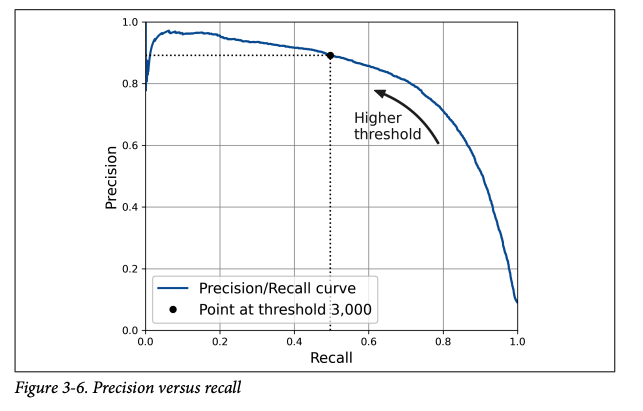

You can see that precision really starts to fall sharply at around 80% recall. You
will probably want to select a precision/recall trade-off just before that drop—for
example, at around 60% recall. But of course, the choice depends on your project.
Suppose you decide to aim for 90% precision. You could use the first plot to find the
threshold you need to use, but that’s not very precise. Alternatively, you can search
for the lowest threshold that gives you at least 90% precision. For this, you can use the
NumPy array’s argmax() method. This returns the first index of the maximum value,
which in this case means the first True value:

In [129]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

0.6060137354660038

To make predictions (on the training set for now), instead of calling the classifier’s
predict() method, you can run this code:

In [130]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

Let’s check these predictions’ precision and recall:

In [131]:
precision_score(y_train_5, y_train_pred_90)

0.9001305483028721

In [132]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.7631433314886552

Great, you have a 90% precision classifier! As you can see, it is fairly easy to create a
classifier with virtually any precision you want: just set a high enough threshold, and
you’re done. But wait, not so fast–a high-precision classifier is not very useful if its
recall is too low! For many applications, 48% recall wouldn’t be great at all.

# The ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with
binary classifiers. It is very similar to the precision/recall curve, but instead of plot‐
ting precision versus recall, the ROC curve plots the true positive rate (another name
for recall) against the false positive rate (FPR). The FPR (also called the fall-out) is the
ratio of negative instances that are incorrectly classified as positive. It is equal to 1 –
the true negative rate (TNR), which is the ratio of negative instances that are correctly
classified as negative. The TNR is also called specificity. Hence, the ROC curve plots
sensitivity (recall) versus 1 – specificity.
To plot the ROC curve, you first use the roc_curve() function to compute the TPR
and FPR for various threshold values:

In [133]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Then you can plot the FPR against the TPR using Matplotlib. The following code
produces the plot in Figure 3-7. To find the point that corresponds to 90% precision,
we need to look for the index of the desired threshold. Since thresholds are listed in
decreasing order in this case, we use <= instead of >= on the first line:

In [134]:
# idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
# tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

# plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
# plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
# plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
# plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# # extra code – just beautifies and saves Figure 3–7
# plt.gca().add_patch(patches.FancyArrowPatch(
#     (0.20, 0.89), (0.07, 0.70),
#     connectionstyle="arc3,rad=.4",
#     arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
#     color="#444444"))
# plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
# plt.xlabel('False Positive Rate (Fall-Out)')
# plt.ylabel('True Positive Rate (Recall)')
# plt.grid()
# plt.axis([0, 1, 0, 1])
# plt.legend(loc="lower right", fontsize=13)
# save_fig("roc_curve_plot")

# plt.show()

Above code not working propertly so i pasted image

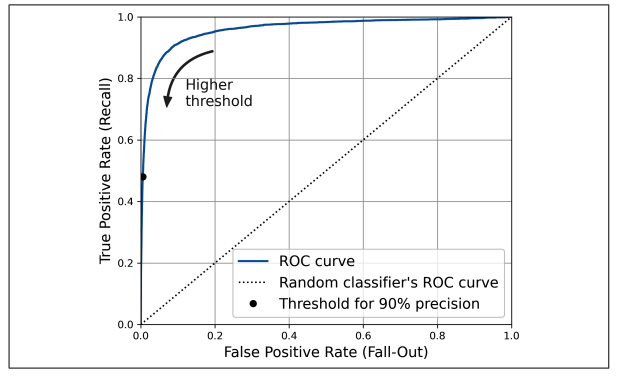

A ROC curve plotting the false positive rate against the true positive rate for
all possible thresholds; the black circle highlights the chosen ratio (at 90% precision and
48% recall)
Once again there is a trade-off: the higher the recall (TPR), the more false positives
(FPR) the classifier produces. The dotted line represents the ROC curve of a purely
random classifier; a good classifier stays as far away from that line as possible (toward
the top-left corner).
One way to compare classifiers is to measure the area under the curve (AUC). A
perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier
will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to estimate the
ROC AUC:

In [135]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9704522882419195

Since the ROC curve is so similar to the precision/recall (PR)
curve, you may wonder how to decide which one to use. As a rule
of thumb, you should prefer the PR curve whenever the positive
class is rare or when you care more about the false positives than
the false negatives. Otherwise, use the ROC curve. For example,
looking at the previous ROC curve (and the ROC AUC score),
you may think that the classifier is really good. But this is mostly
because there are few positives (5s) compared to the negatives
(non-5s). In contrast, the PR curve makes it clear that the classifier
has room for improvement: the curve could really be closer to the
top-right corner

 **Let’s now create a RandomForestClassifier, whose PR curve and F1
 score we can
compare to those of the SGDClassifier:**

In [136]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

The precision_recall_curve() function expects labels and scores for each
instance, so we need to train the random forest classifier and make it assign a
score to each instance. But the RandomForestClassifier class does not have a
decision_function() method, due to the way it works (we will cover this in Chap‐
ter 7). Luckily, it has a predict_proba() method that returns class probabilities for
each instance, and we can just use the probability of the positive class as a score, so
it will work fine.4
 We can call the cross_val_predict() function to train the Random
ForestClassifier using cross-validation and make it predict class probabilities for
every image as follows:

In [137]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

Let’s look at the class probabilities for the first two images in the training set:

In [138]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [139]:
# Not in the code
idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

94.0%


The model predicts that the first image is positive with 89% probability, and it
predicts that the second image is negative with 99% probability. Since each image is
either positive or negative, the probabilities in each row add up to 100%.

These are estimated probabilities, not actual probabilities. For
example, if you look at all the images that the model classified
as positive with an estimated probability between 50% and 60%,
roughly 94% of them are actually positive. So, the model’s estima‐
ted probabilities were much too low in this case—but models can
be overconfident as well. The sklearn.calibration package con‐
tains tools to calibrate the estimated probabilities and make them
much closer to actual probabilities. See the

The second column contains the estimated probabilities for the positive class, so let’s
pass them to the precision_recall_curve() function:

In [140]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

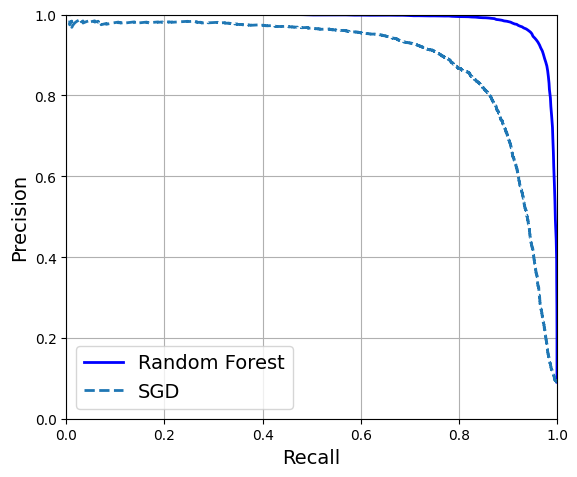

In [141]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("pr_curve_comparison_plot")

plt.show()

Comparing PR curves: the random forest classifier is superior to the SGD
classifier because its PR curve is much closer to the top-right corner, and it has a greater
AUC

As you can see in Figure 3-8, the RandomForestClassifier’s PR curve looks much
better than the SGDClassifier’s: it comes much closer to the top-right corner. Its F1
score and ROC AUC score are also significantly better:

We could use cross_val_predict(forest_clf, X_train, y_train_5, cv=3) to compute y_train_pred_forest, but since we already have the estimated probabilities, we can just use the default threshold of 50% probability to get the same predictions much faster:

In [142]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [143]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983400347444625

In [144]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [145]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

Try measuring the precision and recall scores: you should find about 99.1% precision
and 86.6% recall. Not too bad!
You now know how to train binary classifiers, choose the appropriate metric for
your task, evaluate your classifiers using cross-validation, select the precision/recall
trade-off that fits your needs, and use several metrics and curves to compare various
models. You’re ready to try to detect more than just the 5s.